#1. File Upload

In [1]:
from google.colab import files
upload_file = files.upload()

Saving car1.jpg to car1.jpg


#2. Load File

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
print(cv2.__version__)

4.1.2


In [4]:
!ls -al

total 96
drwxr-xr-x 1 root root  4096 Jun  2 06:47 .
drwxr-xr-x 1 root root  4096 Jun  2 06:47 ..
-rw-r--r-- 1 root root 77963 Jun  2 06:47 car1.jpg
drwxr-xr-x 4 root root  4096 May  6 13:43 .config
drwxr-xr-x 1 root root  4096 May  6 13:44 sample_data


In [5]:
img = cv2.imread('car1.jpg')

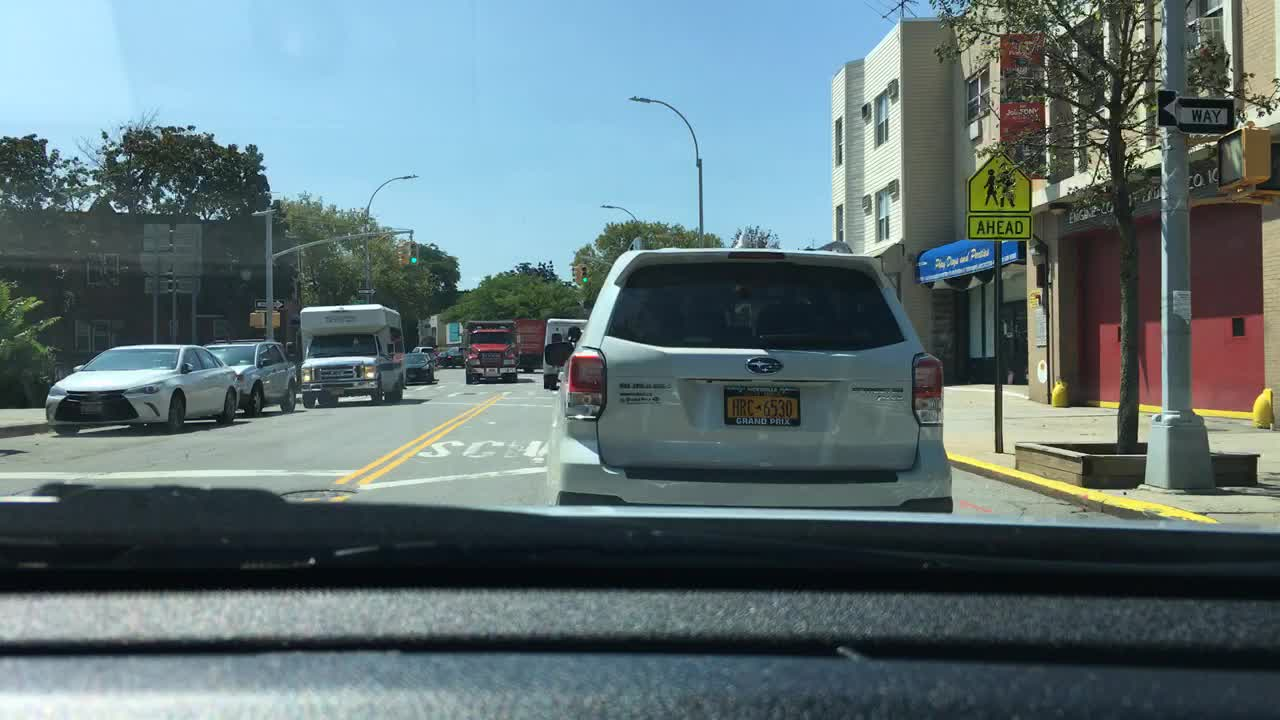

In [6]:
cv2_imshow(img)

In [7]:
print("width: {} pixels".format(img.shape[1]))
print("Height: {} pixels".format(img.shape[0]))
print("Channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]
center = (width//2, height//2)

print(height, width, center)

width: 1280 pixels
Height: 720 pixels
Channels: 3
720 1280 (640, 360)


In [8]:
X = 279 #@param {type:"slider", min:0, max:1280, step:1}
Y = 291 #@param {type:"slider", min:0, max:720, step:1}
SIZE = 50 #@param {type:"slider", min:0, max:1280, step:1}

In [9]:
(b,g,r) = img[X, Y]
print("Pixel at ({}, {}) - Red: {}, Green: {}, Blue: {}".format(X, Y, r, g, b))

Pixel at (279, 291) - Red: 28, Green: 39, Blue: 41


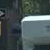

In [10]:
# crop coordination = image[y:y+h, x:x+w]
crop = img[Y:Y+SIZE, X:X+SIZE]
cv2_imshow(crop)

In [11]:
img[Y:Y+SIZE, X:X+SIZE] = (0, 0, 255)

In [ ]:
cv2.rectangle(img, (X+SIZE*2, Y), (X+SIZE*3, Y+SIZE), (0, 255, 0), 5)

In [ ]:
radius = int(SIZE/2)
cv2.circle(img, (X+SIZE*4, Y+radius), radius, (255,255,0), -1)

In [ ]:
cv2.line(img, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)

In [ ]:
cv2.putText(img, 'Apple', (X+SIZE*7, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0))

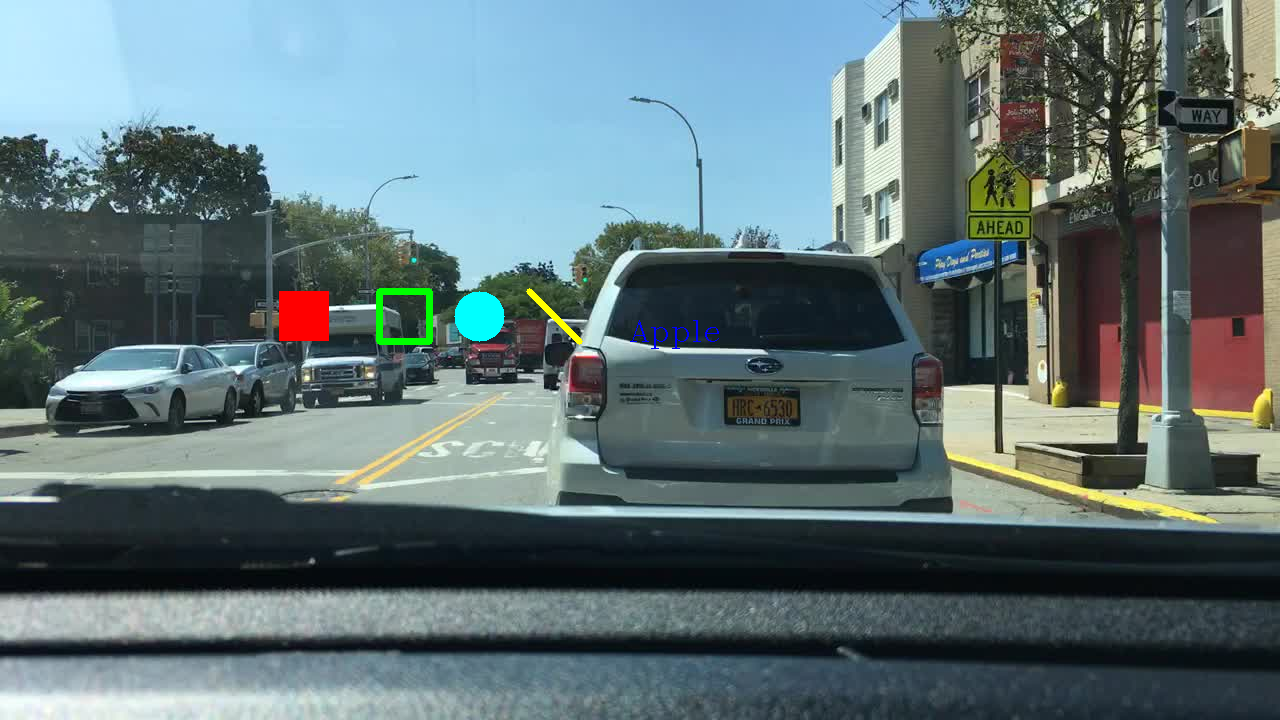

In [16]:
cv2_imshow(img)

In [17]:
cv2.imwrite('car1_copy.jpg', img)

True

In [18]:
!ls -al

total 276
drwxr-xr-x 1 root root   4096 Jun  2 06:48 .
drwxr-xr-x 1 root root   4096 Jun  2 06:47 ..
-rw-r--r-- 1 root root 181378 Jun  2 06:48 car1_copy.jpg
-rw-r--r-- 1 root root  77963 Jun  2 06:47 car1.jpg
drwxr-xr-x 4 root root   4096 May  6 13:43 .config
drwxr-xr-x 1 root root   4096 May  6 13:44 sample_data


In [19]:
def download(path):
  try:
    from google.colab import files
    files.download(path)
  except ImportError:
    import os
    print('Download Error: ', os.path.join(os, getcwd(), path))

In [20]:
download('car1_copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

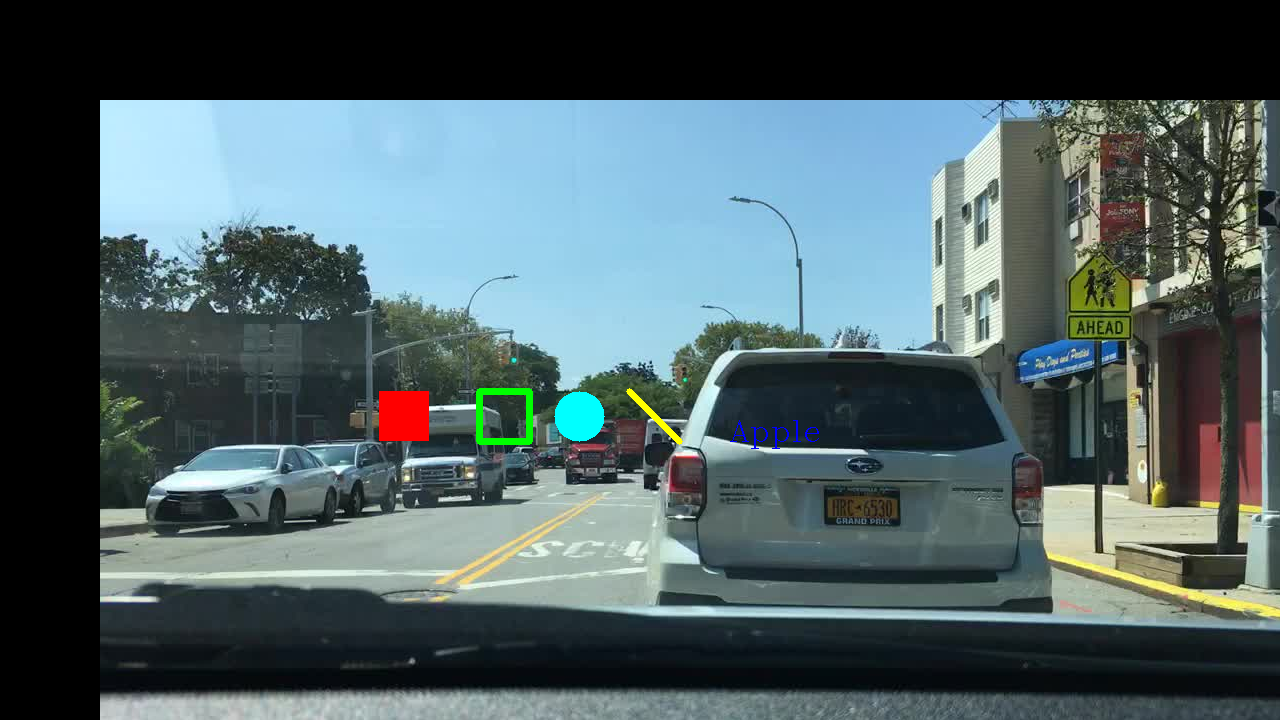

In [21]:
move = np.float32([[1, 0, 100], [0, 1, 100]])
moved = cv2.warpAffine(img, move, (width, height))
cv2_imshow(moved)

In [22]:
rotate = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated = cv2.warpAffine(img, rotate, (width, height))

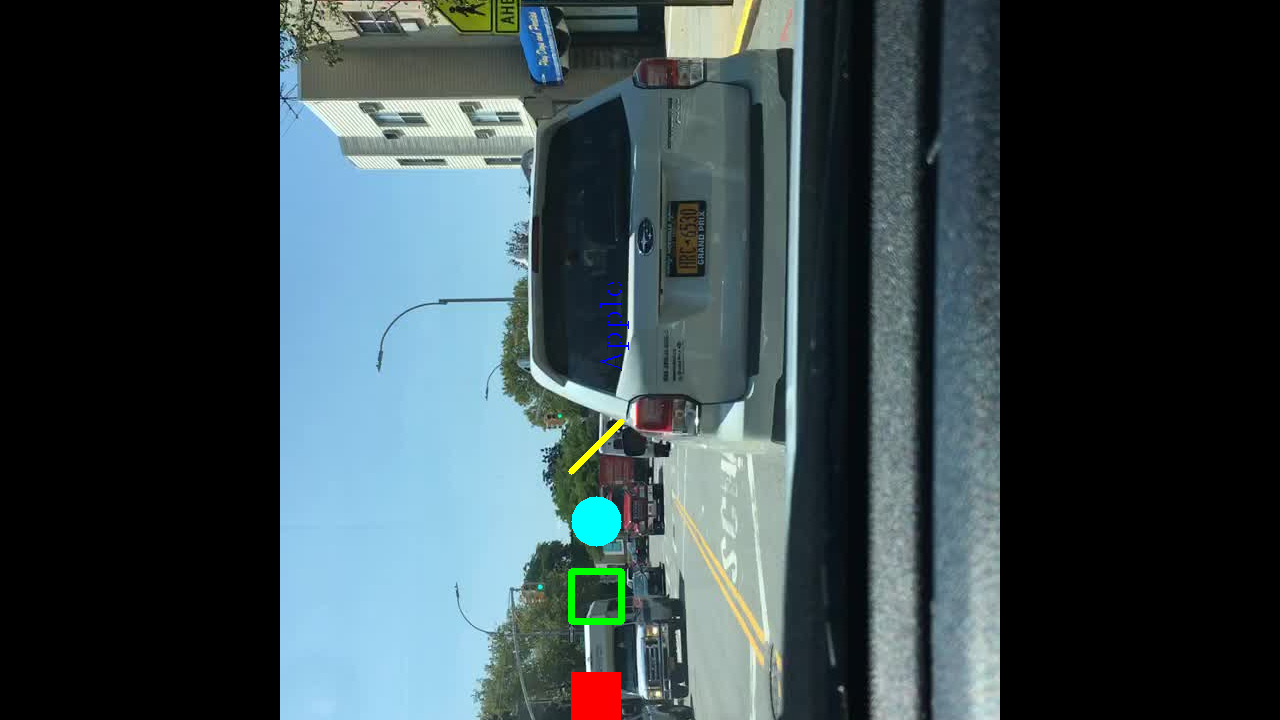

In [23]:
cv2_imshow(rotated)

In [24]:
ratio = SIZE / width
dimention = (SIZE, int(height*ratio))

In [25]:
resized = cv2.resize(img, dimention, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

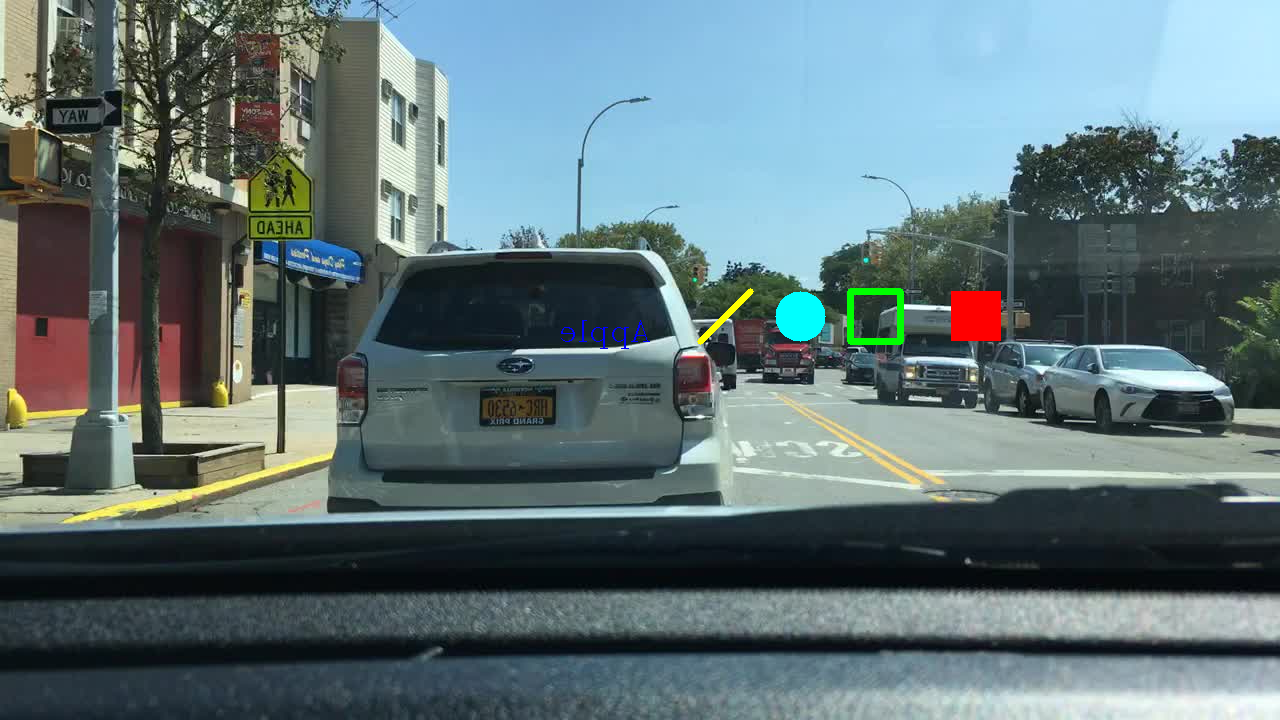

In [27]:
# flipped horizontal 1, vertical 0, both -1
flipped = cv2.flip(img, 1)
cv2_imshow(flipped)